# Registered Motor Vehicles in India March 2015

Source: https://data.gov.in/catalog/road-transport-year-book-2013-14-and-2014-15

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
df = pd.read_csv("data/registered_motor_vehicles_201503/datafile.csv")

In [22]:
df

,Category (Col. 1),States/Uts (Col. 2),Transport - Multi-Axled/ Articulated Vehicles/ Trucks and Lorries (Col. 3),Transport - Light Motor Vehicle (Goods) (Col. 4),Transport - Buses (Col. 5),Transport - Taxis (Col. 6),Transport - Light Motor Vehicle (Passenger) (Col. 7),Transport - Total Transport (Col. 8),Non-Transport - Two Wheelers (Col. 9),Non-Transport - Cars (Col. 10),Non-Transport - Jeeps (Col. 11),Non-Transport - Omni Buses (Col. 12),Non-Transport - Tractors (Col. 13),Non-Transport - Trailers (Col. 14),Non-Transport - Others (Col. 15),Non-Transport - Total Non Transport (Col. 16),Grand Total (Tpt + Non-Tpt.) (Col. 8 + Col. 16) (Col. 17)
0,STATE,Andhra Pradesh,145466.0,167612.0,38269.0,73324.0,397126.0,1013986.0,6147523.0,454054.0,10878.0,21875.0,126862.0,93155.0,13929.0,6868276.0,7882262
1,STATE,Arunachal Pradesh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151279
2,STATE,Assam,133617.0,109792.0,19846.0,53859.0,91936.0,409050.0,1520260.0,508135.0,16128.0,1555.0,35082.0,19527.0,0.0,2100687.0,2509737
3,STATE,Bihar,91823.0,31921.0,29384.0,85119.0,202385.0,440632.0,3489796.0,235762.0,113377.0,NaN,315048.0,157877.0,25104.0,4336964.0,4777596
4,STATE,Chhattisgarh,110629.0,76331.0,52783.0,20960.0,33100.0,293803.0,3471643.0,226044.0,20251.0,6112.0,171648.0,107423.0,17003.0,4020124.0,4313927
5,STATE,Goa,43402.0,15840.0,11224.0,17616.0,4186.0,115807.0,743037.0,216414.0,NaN,0.0,3562.0,NaN,4848.0,967861.0,1083668
6,STATE,Gujarat,352225.0,589984.0,76435.0,108268.0,678364.0,1805276.0,13704879.0,2008748.0,180556.0,NaN,610077.0,353613.0,57418.0,16915291.0,18720567
7,STATE,Haryana,348732.0,167901.0,50207.0,40444.0,144334.0,751638.0,4988518.0,1420621.0,148479.0,2433.0,603663.0,0.0,12198.0,7175912.0,7927550
8,STATE,Himachal Pradesh,76650.0,66358.0,14358.0,34796.0,5907.0,198069.0,545152.0,245106.0,17612.0,2806.0,28367.0,235.0,40057.0,879335.0,1077404
9,STATE,Jammu & Kashmir,45802.0,67077.0,29695.0,37092.0,19777.0,199443.0,644458.0,338475.0,26288.0,2687.0,23427.0,3356.0,6137.0,1044828.0,1244271


# Total Transport vs Non-Transport Vehicles in India

Let's remove the following three columns from the non-transport vehicles data:

    Non-Transport - Tractors (Col. 13)	
    Non-Transport - Trailers (Col. 14)	
    Non-Transport - Others (Col. 15)

In [198]:
filtered = df.copy()
filtered['Non Transport Excl TTO'] = filtered['Non-Transport - Two Wheelers (Col. 9)'] + \
                                     filtered['Non-Transport - Cars (Col. 10)'] + \
                                     filtered['Non-Transport - Jeeps (Col. 11)'] + \
                                     filtered['Non-Transport - Omni Buses (Col. 12)']

del filtered['Non-Transport - Tractors (Col. 13)']
del filtered['Non-Transport - Trailers (Col. 14)']
del filtered['Non-Transport - Others (Col. 15)']

In [201]:
filtered = filtered[['Category (Col. 1)', 'Non-Transport - Total Non Transport (Col. 16)',
               'Transport - Total Transport (Col. 8)']]

total_transport = filtered[filtered['Category (Col. 1)'] == 'TOTAL STATES'] \
                         ['Transport - Total Transport (Col. 8)'].values[0]
    

total_non_transport = filtered[filtered['Category (Col. 1)'] == 'TOTAL STATES'] \
                         ['Non-Transport - Total Non Transport (Col. 16)'].values[0]

In [202]:
print "Total number of registered Transport vehicles in India:", "{:,}".format(int(total_transport))
print "Total number of registered Non-Transport vehicles in India:", "{:,}".format(int(total_non_transport))
print "There are", str(round(total_non_transport / total_transport, 1)),"times more registered Non-Transport vehicles than Transport Vehicles in India"

Total number of registered Transport vehicles in India: 18,292,150
Total number of registered Non-Transport vehicles in India: 180,905,215
There are 9.9 times more registered Non-Transport vehicles than Transport Vehicles in India


In [203]:
pd.DataFrame([total_transport, total_non_transport]).transpose().rename(columns={0: "Transport", 1:"Non_Transport"})

,Transport,Non_Transport
0,18292150.0,180905215.0


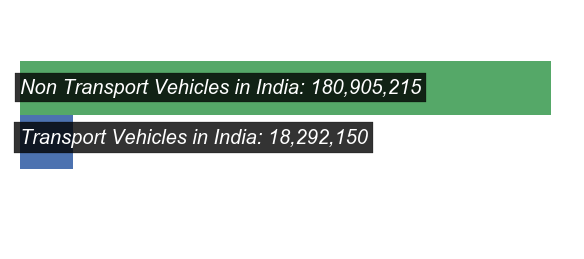

In [205]:
ax = plt.subplot(111)
plot_df = pd.DataFrame([total_transport, total_non_transport]).transpose().rename(columns={0: "Transport", 1:"Non_Transport"})
plot_df.plot(kind='barh', ax=ax, figsize=(10,4), legend=False)
ax.text(0, 0.1, 'Non Transport Vehicles in India: {:,}'.format(int(total_non_transport)), style='italic',fontsize=20, color='white',
        bbox={'facecolor':'black', 'alpha':0.8, 'pad':5})
ax.text(0, -0.13, 'Transport Vehicles in India: {:,}'.format(int(total_transport)), style='italic',fontsize=20, color='white',
        bbox={'facecolor':'black', 'alpha':0.8, 'pad':6})
ax.axis('off');

There are nearly ten times more **non-transport** vehicles than transport vehicles!

# Total Transport vs Non-Transport Vehicles in Maharashtra

In [164]:
maharashtra = df[df['States/Uts (Col. 2)'] == 'Maharashtra']

In [165]:
maharashtra

,Category (Col. 1),States/Uts (Col. 2),Transport - Multi-Axled/ Articulated Vehicles/ Trucks and Lorries (Col. 3),Transport - Light Motor Vehicle (Goods) (Col. 4),Transport - Buses (Col. 5),Transport - Taxis (Col. 6),Transport - Light Motor Vehicle (Passenger) (Col. 7),Transport - Total Transport (Col. 8),Non-Transport - Two Wheelers (Col. 9),Non-Transport - Cars (Col. 10),Non-Transport - Jeeps (Col. 11),Non-Transport - Omni Buses (Col. 12),Non-Transport - Tractors (Col. 13),Non-Transport - Trailers (Col. 14),Non-Transport - Others (Col. 15),Non-Transport - Total Non Transport (Col. 16),Grand Total (Tpt + Non-Tpt.) (Col. 8 + Col. 16) (Col. 17)
14,STATE,Maharashtra,491582.0,868632.0,120750.0,163390.0,695619.0,2339973.0,18603835.0,3113773.0,496255.0,19352.0,572395.0,372054.0,44538.0,23222202.0,25562175


In [166]:
filtered = maharashtra[['Category (Col. 1)', 'Non-Transport - Total Non Transport (Col. 16)',
               'Transport - Total Transport (Col. 8)']]

maharashtra_transport = filtered[filtered['Category (Col. 1)'] == 'STATE'] \
                         ['Transport - Total Transport (Col. 8)'].values[0]
    

maharashtra_non_transport = filtered[filtered['Category (Col. 1)'] == 'STATE'] \
                         ['Non-Transport - Total Non Transport (Col. 16)'].values[0]
    
print "Total number of registered Transport vehicles in Maharashtra:", "{:,}".format(int(maharashtra_transport))
print "Total number of registered Non-Transport vehicles in Maharashtra:", "{:,}".format(int(maharashtra_non_transport))
print "There are", str(round(total_non_transport / total_transport, 1)),"times more registered Non-Transport vehicles than Transport Vehicles in Maharashtra"

Total number of registered Transport vehicles in Maharashtra: 2,339,973
Total number of registered Non-Transport vehicles in Maharashtra: 23,222,202
There are 9.9 times more registered Non-Transport vehicles than Transport Vehicles in Maharashtra


In [176]:
pd.DataFrame([maharashtra_transport, maharashtra_non_transport]).transpose()

,0,1
0,2339973.0,23222202.0


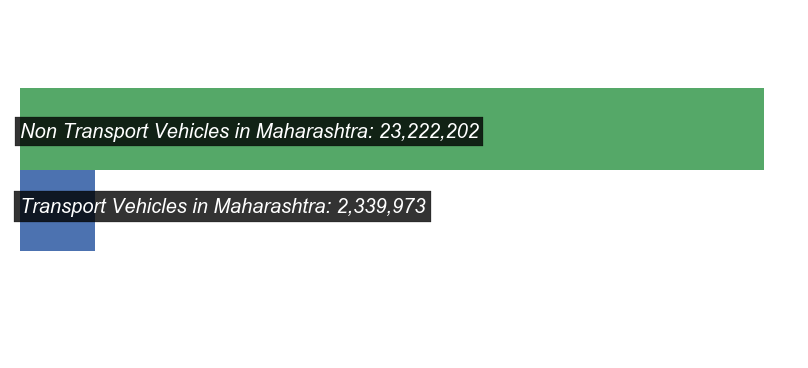

In [177]:
ax = plt.subplot(111)
#plot_df 
new_df = pd.DataFrame([maharashtra_transport, maharashtra_non_transport]).transpose().rename(columns={0: "Transport", 1:"Non_Transport"})
new_df.plot(kind='barh', ax=ax, figsize=(14,6), legend=False)
ax.text(0, 0.1, 'Non Transport Vehicles in Maharashtra: {:,}'.format(int(maharashtra_non_transport)), style='italic',fontsize=20, color='white',
        bbox={'facecolor':'black', 'alpha':0.8, 'pad':5})
ax.text(0, -0.13, 'Transport Vehicles in Maharashtra: {:,}'.format(int(maharashtra_transport)), style='italic',fontsize=20, color='white',
        bbox={'facecolor':'black', 'alpha':0.8, 'pad':6})
ax.axis('off');

# What types of Vehicles in Maharashtra?

In [406]:
columns_to_exclude = ['Category (Col. 1)', 'States/Uts (Col. 2)',
                     'Grand Total (Tpt + Non-Tpt.) (Col. 8 + Col. 16) (Col. 17)',
                     'Non-Transport - Total Non Transport (Col. 16)',
                     'Transport - Total Transport (Col. 8)',
                     ]
maharashra_by_vehicle_type = maharashtra[[col for col in maharashtra.columns if col not in columns_to_exclude]]

In [407]:
maharashra_by_vehicle_type

,Transport - Multi-Axled/ Articulated Vehicles/ Trucks and Lorries (Col. 3),Transport - Light Motor Vehicle (Goods) (Col. 4),Transport - Buses (Col. 5),Transport - Taxis (Col. 6),Transport - Light Motor Vehicle (Passenger) (Col. 7),Non-Transport - Two Wheelers (Col. 9),Non-Transport - Cars (Col. 10),Non-Transport - Jeeps (Col. 11),Non-Transport - Omni Buses (Col. 12),Non-Transport - Tractors (Col. 13),Non-Transport - Trailers (Col. 14),Non-Transport - Others (Col. 15)
14,491582.0,868632.0,120750.0,163390.0,695619.0,18603835.0,3113773.0,496255.0,19352.0,572395.0,372054.0,44538.0


In [408]:
maharashra_by_vehicle_type.columns = [u'Trucks and Multi-Axled Vehicles',
       u'Light Motor Vehicle (Goods)',
       u'Buses', 
       u'Taxis',
       u'Light Motor Vehicle (Passenger)',
       u'Two Wheelers',
       u'Cars',
       u'Jeeps',
       u'Omni Buses',
       u'Tractors',
       u'Trailers',
       u'Others']

In [409]:
maharashra_by_vehicle_type

,Trucks and Multi-Axled Vehicles,Light Motor Vehicle (Goods),Buses,Taxis,Light Motor Vehicle (Passenger),Two Wheelers,Cars,Jeeps,Omni Buses,Tractors,Trailers,Others
14,491582.0,868632.0,120750.0,163390.0,695619.0,18603835.0,3113773.0,496255.0,19352.0,572395.0,372054.0,44538.0


In [410]:
maharashra_by_vehicle_type = maharashra_by_vehicle_type.transpose()
maharashra_by_vehicle_type['vehicle_type'] = maharashra_by_vehicle_type.index
maharashra_by_vehicle_type.columns=['count', 'vehicle_type']
maharashra_by_vehicle_type = maharashra_by_vehicle_type.sort_values(by='count', ascending=True)
maharashra_by_vehicle_type.index = maharashra_by_vehicle_type['vehicle_type']
del maharashra_by_vehicle_type['vehicle_type']

In [411]:
maharashra_by_vehicle_type

,count
vehicle_type,
Omni Buses,19352.0
Others,44538.0
Buses,120750.0
Taxis,163390.0
Trailers,372054.0
Trucks and Multi-Axled Vehicles,491582.0
Jeeps,496255.0
Tractors,572395.0
Light Motor Vehicle (Passenger),695619.0


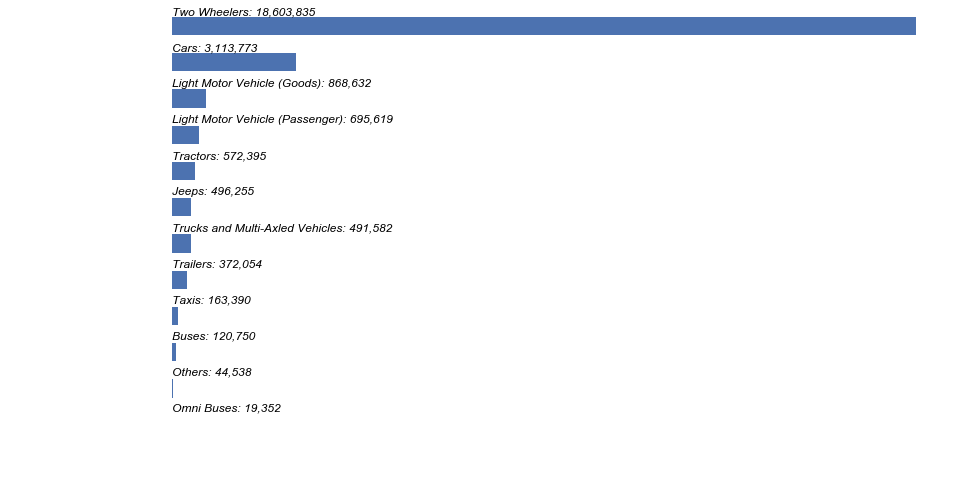

In [412]:
ax = plt.subplot(111)
maharashra_by_vehicle_type.plot(kind='barh',ax=ax, figsize=(14,8), legend=False)
count = 0
for i in maharashra_by_vehicle_type.index:
    count +=1
    ax.text(0, 0.995*count-0.64, '{}: {:,}'.format(i, int(maharashra_by_vehicle_type.loc[i])), style='italic',fontsize=12, color='black',
        bbox={'facecolor':'black', 'alpha':0, 'pad':5})
ax.axis('off')
plt.savefig("maharashra_registered_vehicles.png", dpi=300);

In [413]:
3.1/25.5

0.12156862745098039

In [271]:
maharashra_by_vehicle_type = maharashra_by_vehicle_type.reset_index(drop=True)

In [272]:
maharashra_by_vehicle_type.columns = ['count', 'vehicle_type']

,14,vehicle_type
0,491582.0,Transport - Trucks and Multi-Axled Vehicles
1,868632.0,Transport - Light Motor Vehicle
2,120750.0,Transport - Buses
3,163390.0,Transport - Taxis
4,695619.0,Transport - Light Motor Vehicle
5,2339973.0,Transport - Total Transport
6,18603835.0,Non-Transport - Two Wheelers
7,3113773.0,Non-Transport - Cars
8,496255.0,Non-Transport - Jeeps
9,19352.0,Non-Transport - Omni Buses


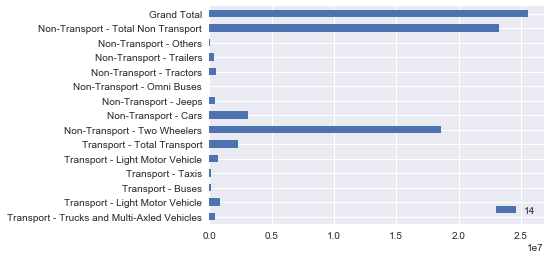

In [270]:
maharashra_by_vehicle_type.plot(kind='barh')

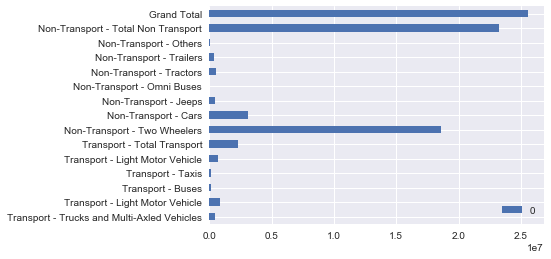

In [243]:
maha
maharashra_by_vehicle_type = maharashra_by_vehicle_type.reset_index(drop=True)
maharashra_by_vehicle_type.transpose().plot(kind='barh')

In [234]:
pd.Series(maharashtra_by_vehicle_type.columns).apply(lambda x: x.split('Col')[0].split(' (')[0])

0    NumberOfVehicles
dtype: object

In [ ]:
.columns = pd.Series(maharashtra_by_vehicle_type.columns).apply(lambda x: x.split('Col')[0].split(' (')[0])
maharashra_by_vehicle_type = maharashra_by_vehicle_type.transpose()
#maharashtra_by_vehicle_type.columns = ['NumberOfVehicles']


In [230]:
pd.Series(maharashtra_by_vehicle_type.index).apply(lambda x: x.split('Col')[0].split(' (')[0])

0     Transport - Multi-Axled/ Articulated Vehicles/...
1                       Transport - Light Motor Vehicle
2                                     Transport - Buses
3                                     Transport - Taxis
4                       Transport - Light Motor Vehicle
5                           Transport - Total Transport
6                          Non-Transport - Two Wheelers
7                                  Non-Transport - Cars
8                                 Non-Transport - Jeeps
9                            Non-Transport - Omni Buses
10                             Non-Transport - Tractors
11                             Non-Transport - Trailers
12                               Non-Transport - Others
13                  Non-Transport - Total Non Transport
14                                          Grand Total
dtype: object

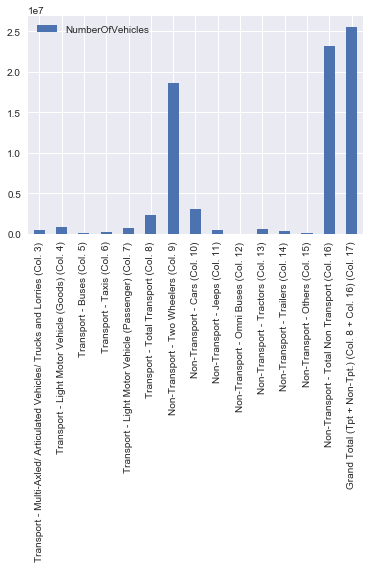

In [217]:
maharashtra_by_vehicle_type.plot(kind='bar')